# Chapter 09 -- Panda Time Series and Date Handling--DRAFT

## Topics Covered:

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2009%20--%20Panda%20Time%20Series%20and%20Date%20Handling"> Creating and manipulating a fixed-frequency of datetime spans </a>

Convert time series from one frequency to another

Increment 'non-standard' datetimes intervals (e.g. business week)

Time Series Walk-Through

Chapter 8, <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2008%20--%20Python%20Date%2C%20Time%2C%20and%20%20Timedelta%20Objects.ipynb"> Understanding Date Time and TimeDelta objects </a> provided a short introduction to Python's built-in datetime capabilities.  In this chapter we illustrate pandas time series and date handling.  



In [1]:
from datetime import date, time, datetime, timedelta
import numpy as np
import pandas as pd
from pandas import Series, DataFrame, Index
from IPython.display import Image

## Creating and manipulating a fixed-frequency of date and time spans

The pd.date_range() method generates a DateTime Index which is applied to a panda Series or DataFrame to provide datetime interval indexing.  We will see examples of its construction methods.  And later we will utilize indexers taking advange of the Date TimeIndex.  

In [2]:
rng = pd.date_range('1/1/2016', periods=90, freq='D')

Print the first 10 dates in the DateTimeIndex

In [3]:
rng[:10]

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10'],
              dtype='datetime64[ns]', freq='D')

In [4]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [5]:
type(ts)

pandas.core.series.Series

Time-stamped data for pandas represent a point in time.

Period being inferred from the datetime string.

In [6]:
pd.Period('2016-01-01')

Period('2016-01-01', 'D')

Get type

In [7]:
type(pd.Period('2016-01-01'))

pandas._period.Period

Period being set explicitly

In [8]:
pd.Period('2016-05', freq='D')

Period('2016-05-01', 'D')

Timestamp and Period can be an index.  Coerced into PeriodIndex and DateTimeIndex

In [9]:
dates = [pd.Timestamp('2012-05-01'), pd.Timestamp('2012-05-02'), pd.Timestamp('2012-05-03')]

In [10]:
dates

[Timestamp('2012-05-01 00:00:00'),
 Timestamp('2012-05-02 00:00:00'),
 Timestamp('2012-05-03 00:00:00')]

In [11]:
 ts = pd.Series(np.random.randn(3), dates)

In [12]:
ts

2012-05-01    0.779167
2012-05-02    1.541141
2012-05-03   -1.131958
dtype: float64

In [13]:
type(ts.index)

pandas.tseries.index.DatetimeIndex

In [14]:
ts.index

DatetimeIndex(['2012-05-01', '2012-05-02', '2012-05-03'], dtype='datetime64[ns]', freq=None)

Convert date string to datetime

In [15]:
pd.to_datetime('2016/11/30')

Timestamp('2016-11-30 00:00:00')

In [16]:
type(pd.to_datetime('2016/11/30'))

pandas.tslib.Timestamp

Convert date string to Timestamp

In [17]:
pd.Timestamp('2016/11/30')

Timestamp('2016-11-30 00:00:00')

In [18]:
type(pd.Timestamp('2016/11/30'))

pandas.tslib.Timestamp

You can assemble a DataFrame by using strings and integers for columns.

In [19]:
df = pd.DataFrame({'year': [2014, 2015, 2016],
                   'month': [1, 2, 3],
                   'day': [1,2,3,]})
df1 = pd.to_datetime(df)

In [20]:
from datetime import datetime, date, time
start = datetime(2016, 1, 1)
end = datetime(2016, 12, 31)
rng = pd.date_range(start,end)

In [21]:
rng

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [22]:
start = datetime(2016, 1, 1)
end = datetime(2016, 12, 31)
b_rng = pd.bdate_range(start,end)

In [23]:
b_rng

DatetimeIndex(['2016-01-01', '2016-01-04', '2016-01-05', '2016-01-06',
               '2016-01-07', '2016-01-08', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14',
               ...
               '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', length=261, freq='B')

In [24]:
rng = pd.date_range(start, end, freq='BM')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts.index

DatetimeIndex(['2016-01-29', '2016-02-29', '2016-03-31', '2016-04-29',
               '2016-05-31', '2016-06-30', '2016-07-29', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-30'],
              dtype='datetime64[ns]', freq='BM')

Returns the first 5

In [25]:
ts[:5].index

DatetimeIndex(['2016-01-29', '2016-02-29', '2016-03-31', '2016-04-29',
               '2016-05-31'],
              dtype='datetime64[ns]', freq='BM')

 Returns the nth, i.e. 2 = every other one

In [26]:
ts[::2]

2016-01-29    0.943878
2016-03-31    1.909312
2016-05-31    1.419306
2016-07-29   -0.394995
2016-09-30    0.394731
2016-11-30    1.603349
Freq: 2BM, dtype: float64

In [27]:
ts[::6]

2016-01-29    0.943878
2016-07-29   -0.394995
Freq: 6BM, dtype: float64

## Time Series Walk-Through

We can begin combining features covered in previous chapters to conduct a walk-through of an actual time-series analysis.  The data is the FHFA House Price Index (HPI) 

HPI is a broad measure of the movement of single-family house prices. It is a weighted, repeat-sales index, meaning that it measures average price changes in repeat sales or refinancings on the same properties. This information is obtained by reviewing repeat mortgage transactions on single-family properties whose mortgages have been purchased or securitized by Fannie Mae or Freddie Mac.  

Details about the data and how it is organized can be found <a href="https://catalog.data.gov/dataset/fhfa-house-price-indexes-hpis"> here </a>. 

This time series begins January 1991 and end August 2016.  Both the seasonally adjusted index 'index_sa' and the non-seaonally adjusted index 'index_nsa' set the index value at 100 for January 1991.  

The .csv file is two parts.  Part 1, rows 2 to 3079 are records for the aggregate market groups at the Census Division level.  The frequency interval is monthly.

Part 2, rows 3080 to 96,243 are more granular with 4 values for level, 'MSA', 'State', 'USA or Census Division', and 'Puerto Rico'.  The frequency interval is quarterly. 

Start with the U.S. portion by reading part 1 of the file.  The pd.read_csv method uses the one required arguement, the input file name to create the DataFrame 'df_all'.

In [28]:
df_all = pd.read_csv("C:\Data\\HPI_master.csv")

Check the first 5 rows to determine if the read_csv() method is giving the expected results.

In [29]:
df_all.tail()

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
99320,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2015,2,160.23,158.62
99321,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2015,3,159.54,161.27
99322,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2015,4,155.14,152.81
99323,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2016,1,150.61,154.71
99324,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2016,2,165.45,163.82


We need to combine the year and period fields into a DataTime Stamp.  The .csv file in cell #xx above is read without any datetime parsing for the fields, 'yr' and 'period'.  We could post-process these fields to construct the appropriate date timestamp values.  

A better approach is below.  The parse_dates= argument allows a <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2002%20--%20Data%20Structures.ipynb#dictionary"> dictionary </a> object with the key being the arbitrary name of the new column created and the key values indicating which fields are to be read in the .csv file.  Recall that Python indexes have a start position of 0.  In the .csv file, these fields are the 7th and 8th.

Sometimes, you may need to create your own date-parser, analogous to building a user-defined SAS INFORMAT to map field values into a datetime object.  This is particularly true in cases where the date value is stored as component values in multiple fields.   

## url for custom date_parser here

In [30]:
df = pd.read_csv("C:\Data\\HPI_master.csv",
                 parse_dates={'date_idx': [6,7]},
                 nrows=3080)

In [31]:
df.shape

(3080, 9)

What are the columns and their data types

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 9 columns):
date_idx      3080 non-null datetime64[ns]
hpi_type      3080 non-null object
hpi_flavor    3080 non-null object
frequency     3080 non-null object
level         3080 non-null object
place_name    3080 non-null object
place_id      3080 non-null object
index_nsa     3080 non-null float64
index_sa      3080 non-null float64
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 216.6+ KB


Check for missing values.

In [33]:
df.isnull().any()

date_idx      False
hpi_type      False
hpi_flavor    False
frequency     False
level         False
place_name    False
place_id      False
index_nsa     False
index_sa      False
dtype: bool

Map the string 'date_idx' column constructed through the date_parser to a datetime value.  Set the 'date' column as the index on the DataFrame.

In [34]:
df['date'] = pd.to_datetime(df['date_idx'])
df.set_index("date", inplace=True, drop=False)

Indexing on the datetime column 'date' creates a 'time-aware' DateTimeIndex.  

In [35]:
df.index

DatetimeIndex(['1991-01-01', '1991-02-01', '1991-03-01', '1991-04-01',
               '1991-05-01', '1991-06-01', '1991-07-01', '1991-08-01',
               '1991-09-01', '1991-10-01',
               ...
               '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01',
               '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
               '2016-07-01', '2016-08-01'],
              dtype='datetime64[ns]', name='date', length=3080, freq=None)

Get the first and last date values.

In [36]:
print('Earliest date is:', df.date.min())
print('Latest date is:', df.date.max())

Earliest date is: 1991-01-01 00:00:00
Latest date is: 2016-08-01 00:00:00


We see from cell #32 above, that we have several categorical columns.  So we need to understand their levels.  Earlier, we saw the .describe() method used for numerical columns.  In this example, specifying the 'include=' argument provides a description of string columns.  

In [37]:
df.describe(include=['O'])

,hpi_type,hpi_flavor,frequency,level,place_name,place_id
count,3080,3080,3080,3080,3080,3080
unique,1,1,1,1,10,10
top,traditional,purchase-only,monthly,USA or Census Division,West North Central Division,DV_PAC
freq,3080,3080,3080,3080,308,308


The 'place_name' column has 10 unique levels or values.  We can examine these values with the .unique() attribute.

In [38]:
df.place_name.unique()

array(['East North Central Division', 'East South Central Division',
       'Middle Atlantic Division', 'Mountain Division',
       'New England Division', 'Pacific Division',
       'South Atlantic Division', 'West North Central Division',
       'West South Central Division', 'United States'], dtype=object)

By setting an index on the column 'place_name', create a sub-set of the DataFrame 'df_us' to include just those rows for the U.S.  The .loc indexer allows row slicing which is covered in detail <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2005%20--%20Understanding%20Indexes.ipynb#.loc-Indexer"> here </a>.

In [39]:
df.set_index('place_name', inplace=True, drop=False)
df_us = df.loc['United States']

Time series data lends itself well to plotting.  Here we use the bokeh package to plot the non-seasonal home price index for the entire U.S. using the 'df_us' DataFrame created above

In [40]:
import bokeh.charts
import bokeh.charts.utils
import bokeh.io
import bokeh.models
import bokeh.palettes
import bokeh.plotting

# Display graphics in this notebook
bokeh.io.output_notebook()

Loading BokehJS ...

In [41]:
p = bokeh.charts.Line(df_us, x='date', y='index_nsa', color='firebrick',  title="Home Price Values in the U.S.")

# Display it
bokeh.io.show(p)

Create the DataFrame 'df_us_3' to select the rows with the values indicated below.

In [42]:
df_us_3 = df.loc[['West South Central Division', 'United States', 'Pacific Division']]

Plot the 3 regions using the U.S. home price index for comparison.

In [43]:
p = bokeh.charts.Line(df_us_3, x='date', y='index_nsa', color='place_name',
                      legend="top_left")

bokeh.io.show(p)

During the Great Recession of 2008-2010, home prices across the U.S. declined dramatically.  Home prices in the Pacific region, which includes California, grew significantly more than the U.S. as a whole.  Aggregate U.S. home prices have regained all of their price losses since then and the Pacific and West South Central regions are not too far behind. 

To continue this analysis, we need to read the remainder of the .csv containing state-level data.  In this instance, we use to 'skiprows=' argument to begin reading on row 3084.  We specify the columns labels. 

Beginning with row 3081 the values for the field 'index_sa' are all missing.  We read starting at row 3081 until end of file.  And since the default is to key off the column names, we supply the column mappings by supplying a<a href= "http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2002%20--%20Data%20Structures.ipynb#tuple"> tuple</a> of names.  Header=None is to prevent the reader from building column names at row position nrows-1, which in our case contains data values.

In [44]:
df_states = pd.read_csv("C:\Data\\HPI_master.csv",
            parse_dates={'date_idx': [6,7]},
            skiprows=3083,
            usecols=(0, 1, 2, 3, 4, 5, 6, 7, 8),
            names=('hpi_type', 'hpi_flavor', 'frequency', 'level', 'place_name', 'place_id', 'yr', 'period', 'index_nsa'),
            header=None)

The following SAS Data Step reads the same .csv file using FIRSTOBS= to begin reading from an arbitary row position.

##SAS program needs to begin read-offset at 3082.  Index start positions are different

````
    data df_states;
          infile 'C:\Data\HPI_master.csv' delimiter=',' missover dsd firstobs=3083; 
          informat hpi_type $12.
                   hpi_flavor $16.
                   frequency $9.
                   level $28.
                   place_name $33.
                   place_id $8.
                   yr $5.
                   period $6.
                   index_nsa 8.;
             input hpi_type $
                   hpi_flavor $
                   frequency $
                   level $
                   place_name $
                   place_id $
                   yr $
                   period $
                   index_nsa ;
````

In [45]:
df_states.shape

(96243, 8)

In [46]:
df_states.head()

,date_idx,hpi_type,hpi_flavor,frequency,level,place_name,place_id,index_nsa
0,1987-01-01,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,100.91
1,1987-02-01,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,100.76
2,1987-03-01,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,94.02
3,1987-04-01,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,91.43
4,1988-01-01,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,81.65


First 5 rows of the SAS data set df_states.

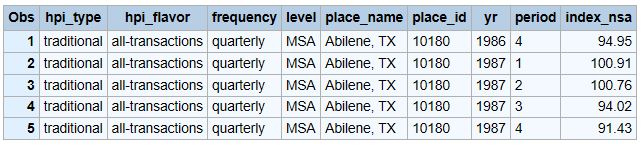

In [47]:
Image(filename='Anaconda3\\output\\df_states_output.JPG')  

Check for missing values.

In [48]:
df_states.isnull().sum()

date_idx      0
hpi_type      0
hpi_flavor    0
frequency     0
level         0
place_name    0
place_id      0
index_nsa     2
dtype: int64

Get unique values for column 'level'

In [49]:
df_states.level.unique()

array(['MSA', 'State', 'USA or Census Division', 'Puerto Rico'], dtype=object)

PROC SQL used to obtain unique values from the variable 'level'.

````
    56       proc sql;
    57          select unique level
    58          from df_states;
    59       quit;
````

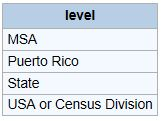

In [50]:
Image(filename='Anaconda3\\output\\level_unique_values.JPG')  

What imputation method should be used to treat missing data?.  We can start by finding the range of values.  Like most languages, there are multiple methods for accomplishing a given task.  

We can set an index on the 'index_nsa' values and find the maximum and minimum.

In [51]:
df_states.set_index('index_nsa', inplace=True, drop=False)

In [52]:
print('Max value for index_nsa:', df_states['index_nsa'].max())
print('Min value for index_nsa:', df_states['index_nsa'].min())

Max value for index_nsa: 791.71
Min value for index_nsa: 18.31


PROC SQL for finding min and max.

````
    85       proc sql;
    86          select max (index_nsa) as max_index_nsa,
    87                 min (index_nsa) as min_index_nsa
    88          from df_states;
    89       quit;
````

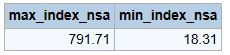

In [53]:
Image(filename='Anaconda3\\output\\max_min_index_nsa.JPG')  

Alternatively, we can sort the values and use the <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2005%20--%20Understanding%20Indexes.ipynb#.iloc-Indexer"> iloc </a> indexer.  

Recall that the .iloc indexer returns slices by index position similiar to the way \_n\_ in SAS behaves.

## Sort and Sort Sequences

This is a good opportunity to understand the sort behaviors for DataFrames.  We begin by examing the default sort.  We have provided the minimum argument to the .sort_values attribute, the sort key in the example below.

In [54]:
default_srt = df_states.sort_values('index_nsa')

Display the first 4 rows of the sorted DataFrame 'default_srt'

In [55]:
default_srt.iloc[0:4]

,date_idx,hpi_type,hpi_flavor,frequency,level,place_name,place_id,index_nsa
index_nsa,,,,,,,,
18.31,1975-03-01,traditional,all-transactions,quarterly,MSA,San Francisco-Redwood City-South San Francisco...,41884,18.31
18.82,1975-04-01,traditional,all-transactions,quarterly,MSA,"San Jose-Sunnyvale-Santa Clara, CA",41940,18.82
18.91,1981-04-01,traditional,all-transactions,quarterly,MSA,"Honolulu ('Urban Honolulu'), HI",46520,18.91
19.26,1975-04-01,traditional,all-transactions,quarterly,MSA,San Francisco-Redwood City-South San Francisco...,41884,19.26


By examing the first the first four rows of the sorted DataFrame, 'default_srt' above, we see the default sort sequence is ascending.  Of course, by reading the doc for <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html"> pandas.DataFrame.sort_values </a> we could 'see' this as well. 

The default SAS sort syntax is:

````
    30        proc sort data=df_states;
    31           by index_nsa;
    NOTE: 96244 observations were read from "WORK.df_states"
    NOTE: Data set "WORK.df_states" has 96244 observation(s) and 9 variable(s)
    32        
    33         data first4;
    34            set df_states (obs=4);
    35            by index_nsa;
````

Like pandas, the default SAS sort sequence is ascending.  And this is confirmed by the SAS doc located <a href="https://support.sas.com/documentation/cdl/en/proc/61895/HTML/default/viewer.htm#sort-overview.htm"> here </a>.

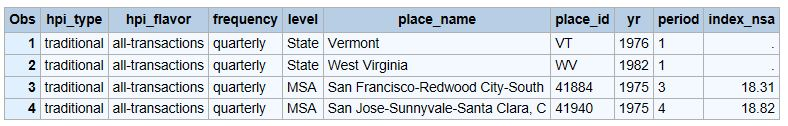

In [56]:
Image(filename='Anaconda3\\output\\default_first_four.JPG')  

However, in contrast to the panda default sort, the default SAS sort sequence places its missing values first in the data set as illustrated above.

By displaying the last 4 rows in the 'default_srt' DataFrame we find the 2 NaN's sorted last since this is the default location panda places its missing values.

In [57]:
default_srt.tail(4)  

,date_idx,hpi_type,hpi_flavor,frequency,level,place_name,place_id,index_nsa
index_nsa,,,,,,,,
780.98,2016-01-01,traditional,all-transactions,quarterly,State,District of Columbia,DC,780.98
791.71,2016-02-01,traditional,all-transactions,quarterly,State,District of Columbia,DC,791.71
NaN,1976-01-01,traditional,all-transactions,quarterly,State,Vermont,VT,NaN
NaN,1982-01-01,traditional,all-transactions,quarterly,State,West Virginia,WV,NaN


Since the panda default sort sequence places NaN's last in the sort sequence by default this can be used an alternative to using boolean operators and the .loc() method to detect missing values.

The SAS program to access the last four observations in the data set is:

````
    79         data last4;  
    80           set df_states (firstobs=96241);
    81           by index_nsa;

    NOTE: 4 observations were read from "WORK.last4"
````    

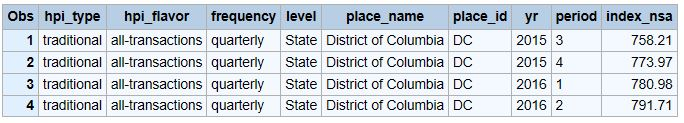

In [58]:
Image(filename='Anaconda3\\output\\sort_last_four.JPG')  

So naturally, we can alter the organization of the data_frame by supplying arguments and values to the sort_values attribute.  The example below sorts using a descending sort sequence and places missing values at the beginning.

In [59]:
states_desc = df_states.sort_values('index_nsa', ascending=False, na_position='first')

Setting the na_position= argument to 'first' places NaN's at the beginning of the sort sequence.  This is the same beavhior for SAS' sort sequence.  Details describing SAS sort order for missing values is descried <a href="http://support.sas.com/documentation/cdl/en/lrcon/68089/HTML/default/viewer.htm#p0tmoipp0ci6wkn0z27ev47sv0ov.htm"> here </a>.

The first two rows in the DataFrame 'states_desc' contain the NaN's values for the 'index_nsa' column, while the next 2 rows contain the highest values.

In [60]:
states_desc.iloc[0:4,]

,date_idx,hpi_type,hpi_flavor,frequency,level,place_name,place_id,index_nsa
index_nsa,,,,,,,,
NaN,1976-01-01,traditional,all-transactions,quarterly,State,Vermont,VT,NaN
NaN,1982-01-01,traditional,all-transactions,quarterly,State,West Virginia,WV,NaN
791.71,2016-02-01,traditional,all-transactions,quarterly,State,District of Columbia,DC,791.71
780.98,2016-01-01,traditional,all-transactions,quarterly,State,District of Columbia,DC,780.98


SAS has missing 28 missing value indicators for numerics described <a href="http://support.sas.com/documentation/cdl/en/lrcon/68089/HTML/default/viewer.htm#p175x77t7k6kggn1io94yedqagl3.htm"> here </a>.  However, if you want missing values to be 'first' in a data set using an ascending sort sequence, then the missing value indicator must be an actual numeric value larger than the largest non-missing value.  In other words, by default, the SAS missing value indicator for numerics is always the smallest numeric value.

The SAS example below sorts the df_states data set in descending order by the 'index_nsa' variable.  Like the panda example above, the 

    out=states_srt2
    
syntax creates the new SAS data set 'states_srt2'. 

````
    44        proc sort data=df_states
    45           out=states_srt2;
    46           by descending index_nsa;
    NOTE: 96244 observations were read from "WORK.df_states"
    NOTE: Data set "WORK.states_srt2" has 96244 observation(s) and 9 variable(s)
    47        
    48         data first4;
    49           set states_srt2 (obs=4);
    50           by descending index_nsa;
````

## Convert time series from one frequency to another

In the case of the aggregate U.S. housing index (DataFrame 'df_us') created above, the value for the 'frequency' column is monthly. So we need to know the frequency value for the 'states' DataFrame.    

Re-read the .cvs file to create a new DataFrame called 'states'.

In [107]:
df_states = pd.read_csv("C:\Data\\HPI_master.csv",
           parse_dates={'date_idx': [6,7]},
           skiprows=3081,
           usecols=(0, 1, 2, 3, 4, 5, 6, 7, 8),
           names=('hpi_type', 'hpi_flavor', 'frequency', 'level', 'place_name', 'place_id', 'yr', 'period', 'index_nsa'),
           header=None)

Confirm date parsing combining fields 6 and 7 in the .csv file returns a datetime timestamp for 'date_idx' column

In [112]:
df_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96245 entries, 0 to 96244
Data columns (total 8 columns):
date_idx      96245 non-null datetime64[ns]
hpi_type      96245 non-null object
hpi_flavor    96245 non-null object
frequency     96245 non-null object
level         96245 non-null object
place_name    96245 non-null object
place_id      96245 non-null object
index_nsa     96243 non-null float64
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 5.9+ MB


Inspect values for the categorical columns.

In [64]:
df_states.describe(include=['O'])

,hpi_type,hpi_flavor,frequency,level,place_name,place_id
count,96243,96243,96243,96243,96243,96243
unique,4,3,1,4,464,464
top,traditional,all-transactions,quarterly,MSA,"Los Angeles-Long Beach-Glendale, CA (MSAD)",31084
freq,90805,67189,96243,69459,472,472


There is a frequency mis-match.  The periodicity for the DataFrame 'df_us' is monthly and quarterly for the DataFrame 'df_states'.  Before converting the 'df_states' frequency, we get the unique values for the columns 'hpi_type', 'hpi_flavor', and 'level'.  

We do this by using the .unique() attribute as shown below.  

In [65]:
df_states['level'].unique()

array(['MSA', 'State', 'USA or Census Division', 'Puerto Rico'], dtype=object)

If we had a long list of columns where finding unique values is needed, the approach above becomes tedious, so an iterative approach is called for using a for loop shown below.

Start by creating a <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2002%20--%20Data%20Structures.ipynb#list">list</a> called 'lvls' using the .select_dtypes() attribute to include those columns with dtype value 'O' selecting columns with string values.

In [76]:
lvls = list(df_states.select_dtypes(include=['O']).columns)

Inspect the list 'lvls'.

In [113]:
lvls 

['hpi_type', 'hpi_flavor', 'frequency', 'level', 'place_name', 'place_id']

Use a for loop to get the first 4 items from the 'lvls' list.  The last 2 items have 464 unique levels so use a different approach to process them.

In [114]:
for item in lvls[:4]:
   print(item, 'levels are:', df_states[item].unique())    

hpi_type levels are: ['traditional' 'non-metro' 'distress-free' 'developmental']
hpi_flavor levels are: ['all-transactions' 'expanded-data' 'purchase-only']
frequency levels are: ['quarterly']
level levels are: ['MSA' 'State' 'USA or Census Division' 'Puerto Rico']


In order to subset rows by 'place_name', create an <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2005%20--%20Understanding%20Indexes.ipynb#Setting-and-resetting-Indicies">index.

In [85]:
df_states.set_index('place_name', inplace=True, drop=False)

In the sort sequence section above we notice how the Washington, D.C. metro had the highest value for 'index_nsa' making these rows a good place to start. Square bracket ([]) is a signal for string slicing by an indexed column, 'place_name' in this case.  Is this market segment an outlier compared to other markets and compared against aggregate house prices in the U.S?

The section <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2005%20--%20Understanding%20Indexes.ipynb#Mixing-.loc-Indexer-with-Boolean-Operators">Mixing .loc Indexer with Boolean Operators</a> discusses filtering by rows.  However, those examples used complete string values.  In this case, we need a partial string slicing approach. 

The .str.contains() attribute is chained to the indexed selection for the indexed column 'place_name'.  The argument value is the search string.

In [89]:
df_states[df_states['place_name'].str.contains("Washington")].head()

,date_idx,hpi_type,hpi_flavor,frequency,level,place_name,place_id,index_nsa
place_name,,,,,,,,
"Washington-Arlington-Alexandria, DC-VA-MD-WV (MSAD)",1975-03-01,traditional,all-transactions,quarterly,MSA,"Washington-Arlington-Alexandria, DC-VA-MD-WV (...",47894,31.33
"Washington-Arlington-Alexandria, DC-VA-MD-WV (MSAD)",1975-04-01,traditional,all-transactions,quarterly,MSA,"Washington-Arlington-Alexandria, DC-VA-MD-WV (...",47894,31.05
"Washington-Arlington-Alexandria, DC-VA-MD-WV (MSAD)",1976-01-01,traditional,all-transactions,quarterly,MSA,"Washington-Arlington-Alexandria, DC-VA-MD-WV (...",47894,31.02
"Washington-Arlington-Alexandria, DC-VA-MD-WV (MSAD)",1976-02-01,traditional,all-transactions,quarterly,MSA,"Washington-Arlington-Alexandria, DC-VA-MD-WV (...",47894,32.27
"Washington-Arlington-Alexandria, DC-VA-MD-WV (MSAD)",1976-03-01,traditional,all-transactions,quarterly,MSA,"Washington-Arlington-Alexandria, DC-VA-MD-WV (...",47894,33.35


 <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2005%20--%20Understanding%20Indexes.ipynb#Mixing-.loc-Indexer-with-Boolean-Operators">Boolean operators</a> can be used to slice by multiple levels of criteria.

In [93]:
df_states[(df_states['place_name'].str.contains("Washington")) & (df_states.hpi_type=='traditional')].head()

,date_idx,hpi_type,hpi_flavor,frequency,level,place_name,place_id,index_nsa
place_name,,,,,,,,
"Washington-Arlington-Alexandria, DC-VA-MD-WV (MSAD)",1975-03-01,traditional,all-transactions,quarterly,MSA,"Washington-Arlington-Alexandria, DC-VA-MD-WV (...",47894,31.33
"Washington-Arlington-Alexandria, DC-VA-MD-WV (MSAD)",1975-04-01,traditional,all-transactions,quarterly,MSA,"Washington-Arlington-Alexandria, DC-VA-MD-WV (...",47894,31.05
"Washington-Arlington-Alexandria, DC-VA-MD-WV (MSAD)",1976-01-01,traditional,all-transactions,quarterly,MSA,"Washington-Arlington-Alexandria, DC-VA-MD-WV (...",47894,31.02
"Washington-Arlington-Alexandria, DC-VA-MD-WV (MSAD)",1976-02-01,traditional,all-transactions,quarterly,MSA,"Washington-Arlington-Alexandria, DC-VA-MD-WV (...",47894,32.27
"Washington-Arlington-Alexandria, DC-VA-MD-WV (MSAD)",1976-03-01,traditional,all-transactions,quarterly,MSA,"Washington-Arlington-Alexandria, DC-VA-MD-WV (...",47894,33.35


Having established a monthly frequency for 'df_us' DataFrame and a quarterly frequency for the 'df_states', the following operations are needed to answer the question above.

    In the 'df_us' DataFrame
        *shift the 'frequency' column values from monthly to quarterly
        *filter rows whose values are 'traditional' for column 'hpi_type' *and* 'all-transactions' for column 'hpi_flavor'
        
    In the 'df_states' DataFrame
        * filter rows for values 'traditional' for column 'hpi_type' *and* 'all-transactions' for column 'hpi_flavor' *and*
        * column 'place_name.str.contains("Washington")'

panda frequency conversion doc is found <a href="http://pandas.pydata.org/pandas-docs/stable/timeseries.html#frequency-conversion"> here</a>.  The .asfreq() method accepts frequency offset suffixes that are listed <a href="http://pandas.pydata.org/pandas-docs/stable/timeseries.html#anchored-offsets"> here</a>. 

In [118]:
df_states['date_qtr'] = df_states['date_idx'].asfreq(('Q'))

In [123]:
df_states.head()

,date_idx,hpi_type,hpi_flavor,frequency,level,place_name,place_id,index_nsa,date_qtr
0,1986-03-01,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,107.49,NaT
1,1986-04-01,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,94.95,NaT
2,1987-01-01,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,100.91,NaT
3,1987-02-01,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,100.76,NaT
4,1987-03-01,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,94.02,NaT


Create the new DataFrame 'df_wash' to include row slices where the attribute .str.contains() value is "Washington" and the value "traditional" is in the column 'hpi_type'.

In [119]:
 df_wash = df_states[(df_states['place_name'].str.contains("Washington")) & (df_states.hpi_type=='traditional')]

In [121]:
df_wash.shape

(738, 9)

In [124]:
#p = bokeh.charts.Line(df_wash, x='date_qtr', y='index_nsa', color='firebrick',  title= \
#    "Home Price Values in the Washington Metro Area")

# Display it
#bokeh.io.show(p)

In [ ]:
df_states.sort_values('place_name')


In [ ]:
df_states.set_index('place_name', inplace=True)

In [ ]:
df_states.columns

In [ ]:
la = df_states.loc['Los Angeles-Long Beach-Glendale, CA (MSAD)']

In [ ]:
la

## Navigation

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/tree/master/"> Return to Chapter List </a>    